In [1]:
import gpflow
import numpy as np
import matplotlib
import GPyOpt

# The lines below are specific to the notebook format
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

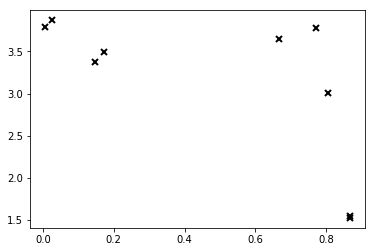

In [63]:
data = np.genfromtxt('./data/regression_1D.csv', delimiter=',')
X = np.array(data[:, 0].reshape(-1, 1))[:9,:]
Y = np.array(data[:, 1].reshape(-1, 1))[:9,:]

plt.plot(X, Y, 'kx', mew=2)

In [64]:
print(X[:2,:])
print(Y[:2,:])

[[0.86581659]
 [0.66617009]]
[[1.52553143]
 [3.6434203 ]]


In [65]:
k = gpflow.kernels.Matern52(input_dim=1)

In [66]:
k.as_pandas_table()  #, or simply:
k

,class,prior,transform,trainable,shape,fixed_shape,value
Matern52/lengthscales,Parameter,None,+ve,True,(),True,1.0
Matern52/variance,Parameter,None,+ve,True,(),True,1.0


In [136]:
k

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.2167318611794117
GPR/kern/variance,Parameter,None,+ve,True,(),True,7.845533256322853


In [67]:
# including training
m = gpflow.models.GPR(X, Y, kern=k, mean_function=None)

In [68]:
m.likelihood.variance = 0.01
m.kern.lengthscales = 0.3

In [69]:
opt = gpflow.train.ScipyOptimizer()
opt.minimize(m)
m.as_pandas_table()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 8.136423
  Number of iterations: 18
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 8.136423
  Number of iterations: 18
  Number of functions evaluations: 19


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.2167318611794117
GPR/kern/variance,Parameter,None,+ve,True,(),True,7.845533256322853
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.0008633082487089559


In [70]:
## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)
## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)
## generate 10 samples from posterior
samples = m.predict_f_samples(xx, 10)  # shape (10, 100, 1)


In [131]:
fmin = model.predict_f(model.X.value)[0].min()
fmin

3.9174089051399092

In [133]:
model.X.value[0]

array([-2.59933207, 13.83144939])

In [135]:
model.predict_f(np.array([model.X.value[0]]))[0]

array([[10.73704792]])

In [119]:
help(model)

Help on GPR in module gpflow.models.gpr object:

class GPR(gpflow.models.model.GPModel)
 |  Gaussian Process Regression.
 |  
 |  This is a vanilla implementation of GP regression with a Gaussian
 |  likelihood.  Multiple columns of Y are treated independently.
 |  
 |  The log likelihood of this model is sometimes referred to as the
 |  'marginal log likelihood', and is given by
 |  
 |  .. math::
 |  
 |     \log p(\mathbf y | \mathbf f) = \mathcal N(\mathbf y | 0, \mathbf K + \sigma_n \mathbf I)
 |  
 |  Method resolution order:
 |      GPR
 |      gpflow.models.model.GPModel
 |      gpflow.models.model.Model
 |      gpflow.params.parameterized.Parameterized
 |      gpflow.core.node.Node
 |      gpflow.core.parentable.Parentable
 |      gpflow.core.compilable.ICompilable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      X is a data matrix, size N x D
 |      Y is a data matrix, size N x R
 |      kern, mean_function are appropria

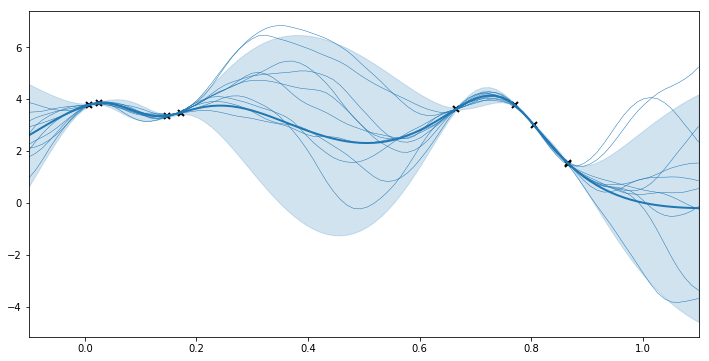

In [71]:
## plot 
plt.figure(figsize=(12, 6))
plt.plot(X, Y, 'kx', mew=2)
plt.plot(xx, mean, 'C0', lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:,0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

plt.plot(xx, samples[:, :, 0].T, 'C0', linewidth=.5)
plt.xlim(-0.1, 1.1);

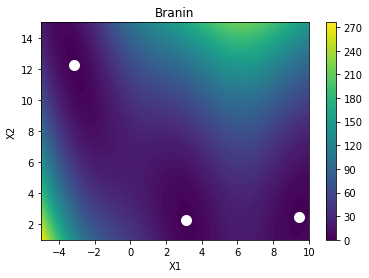

In [46]:
objective_true  = GPyOpt.objective_examples.experiments2d.branin()                 # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(sd = 0.1)         # noisy version
bounds = objective_noisy.bounds     
objective_true.plot()

In [91]:
def generate_init(bounds, initial_n):
    dim = len(bounds)
    init_x = np.random.rand(initial_n, dim)
    for i in range(dim):
        init_x[:,i]=init_x[:,i]*(bounds[i][1]-bounds[i][0])+bounds[i][0]
    return init_x

In [104]:
X = generate_init(bounds,20)
Y = objective_true.f(X)

In [105]:
X

array([[-2.59933207, 13.83144939],
       [ 6.57512814, 14.060013  ],
       [ 3.48813392,  7.00074722],
       [ 9.73034482,  7.48080162],
       [ 7.38718619,  2.62215312],
       [-4.89716867, 12.88776687],
       [ 6.79972228, 12.72727379],
       [-4.62543302,  4.3548834 ],
       [ 2.44433765,  3.4092608 ],
       [-3.26096152,  4.79365052],
       [-0.18474551,  7.96472534],
       [ 9.42633456, 11.38317033],
       [ 7.10221126,  7.71291373],
       [ 2.19794545,  1.41650164],
       [ 1.51578621,  8.95139565],
       [ 7.18746151, 10.17548223],
       [ 4.71602795,  1.35590554],
       [-2.21160901, 14.08108135],
       [ 0.5765561 ,  9.4882028 ],
       [-0.02423122,  6.65956378]])

In [106]:
Y

array([[ 10.73704772],
       [187.63190078],
       [ 26.77395162],
       [ 24.27226674],
       [ 17.08893669],
       [ 28.79986197],
       [153.36157645],
       [148.71256775],
       [  3.91740886],
       [ 61.84008297],
       [ 23.21521799],
       [ 80.73000044],
       [ 59.81001686],
       [  8.28731101],
       [ 37.20272973],
       [ 96.87914127],
       [ 11.03507362],
       [ 20.69901661],
       [ 38.08458095],
       [ 20.98483889]])

In [107]:
kernel = gpflow.kernels.Matern52(input_dim=2, ARD=True)
kernel

,class,prior,transform,trainable,shape,fixed_shape,value
Matern52/lengthscales,Parameter,None,+ve,True,"(2,)",True,"[1.0, 1.0]"
Matern52/variance,Parameter,None,+ve,True,(),True,1.0


In [108]:
model = gpflow.models.GPR(X,Y,kern=kernel,mean_function=None)
model.as_pandas_table()  #, or simply:
model

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,"(2,)",True,"[1.0, 1.0]"
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0


In [109]:
opt = gpflow.train.ScipyOptimizer()
opt.minimize(model)
model.as_pandas_table()

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 89.759111
  Number of iterations: 74
  Number of functions evaluations: 80


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 89.759111
  Number of iterations: 74
  Number of functions evaluations: 80


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,"(2,)",True,"[15.528947280962132, 48.58550392923176]"
GPR/kern/variance,Parameter,None,+ve,True,(),True,446030.6658561688
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1e-06


In [113]:
grid = 20
x1 = np.linspace(bounds[0][0], bounds[0][1], grid)
x2 = np.linspace(bounds[1][0], bounds[1][1], grid)
X1, X2 = np.meshgrid(x1, x2)
_X = np.hstack((X1.reshape(grid*grid,1),X2.reshape(grid*grid,1)))
_Y,var =  model.predict_f(_X)

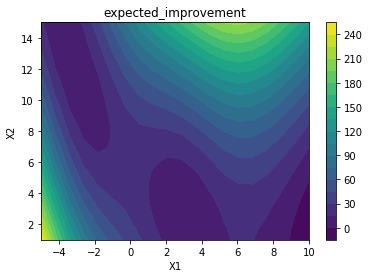

In [114]:
plt.figure()    
plt.contourf(X1, X2, _Y.reshape((grid,grid)),grid)
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("expected_improvement")
plt.show()

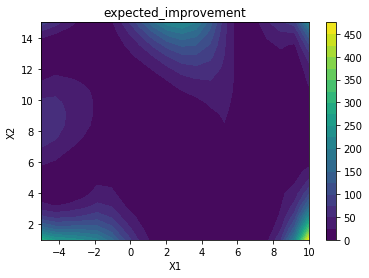

In [115]:
plt.figure()    
plt.contourf(X1, X2, var.reshape((grid,grid)),grid)
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("expected_improvement")
plt.show()

In [2]:
import gpflow
import time
import numpy as np
import tensorflow as tf

In [3]:
for k in range(50):
    N = 12
    X = np.random.rand(N, 1)
    Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + np.random.randn(N, 1) * 0.1 + 3

    k = gpflow.kernels.Matern52(1, lengthscales=0.3)
    m = gpflow.models.GPR(X, Y, kern=k)

    st = time.time()
    gpflow.train.ScipyOptimizer().minimize(m)
    print(time.time() - st)
    print(len(tf.all_variables()))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 12.406101
  Number of iterations: 16
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 12.406101
  Number of iterations: 16
  Number of functions evaluations: 19


0.61299729347229
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Please use tf.global_variables instead.


5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.057835
  Number of iterations: 32
  Number of functions evaluations: 36


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.057835
  Number of iterations: 32
  Number of functions evaluations: 36


0.6622195243835449
10
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 15.711632
  Number of iterations: 12
  Number of functions evaluations: 14


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 15.711632
  Number of iterations: 12
  Number of functions evaluations: 14


0.6577012538909912
15


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 14.726391
  Number of iterations: 19
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 14.726391
  Number of iterations: 19
  Number of functions evaluations: 21


0.7175118923187256
20


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 10.605797
  Number of iterations: 12
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 10.605797
  Number of iterations: 12
  Number of functions evaluations: 16


0.8485043048858643
25
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.746530
  Number of iterations: 21
  Number of functions evaluations: 23


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.746530
  Number of iterations: 21
  Number of functions evaluations: 23


0.9512677192687988
30
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.678901
  Number of iterations: 14
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.678901
  Number of iterations: 14
  Number of functions evaluations: 15


0.9897022247314453
35
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.774695
  Number of iterations: 19
  Number of functions evaluations: 20


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.774695
  Number of iterations: 19
  Number of functions evaluations: 20


1.0399625301361084
40


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 7.606683
  Number of iterations: 23
  Number of functions evaluations: 30


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 7.606683
  Number of iterations: 23
  Number of functions evaluations: 30


1.0773534774780273
45
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.534564
  Number of iterations: 14
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.534564
  Number of iterations: 14
  Number of functions evaluations: 15


1.1427311897277832
50
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 19.678233
  Number of iterations: 13
  Number of functions evaluations: 14


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 19.678233
  Number of iterations: 13
  Number of functions evaluations: 14


1.4447135925292969
55
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 12.298691
  Number of iterations: 16
  Number of functions evaluations: 24


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 12.298691
  Number of iterations: 16
  Number of functions evaluations: 24


1.3455114364624023
60


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.327110
  Number of iterations: 18
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.327110
  Number of iterations: 18
  Number of functions evaluations: 19


1.4612452983856201
65


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.750035
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.750035
  Number of iterations: 15
  Number of functions evaluations: 16


1.581000566482544
70


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.114436
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.114436
  Number of iterations: 15
  Number of functions evaluations: 16


1.6514246463775635
75


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.458725
  Number of iterations: 52
  Number of functions evaluations: 55


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.458725
  Number of iterations: 52
  Number of functions evaluations: 55


1.9157195091247559
80


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 19.360854
  Number of iterations: 40
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 19.360854
  Number of iterations: 40
  Number of functions evaluations: 45


1.9658498764038086
85


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 6.925879
  Number of iterations: 14
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 6.925879
  Number of iterations: 14
  Number of functions evaluations: 19


2.2228264808654785
90


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.747243
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.747243
  Number of iterations: 15
  Number of functions evaluations: 16


2.2343533039093018
95


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 10.700512
  Number of iterations: 13
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 10.700512
  Number of iterations: 13
  Number of functions evaluations: 21


2.310325860977173
100


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.006401
  Number of iterations: 38
  Number of functions evaluations: 43


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.006401
  Number of iterations: 38
  Number of functions evaluations: 43


2.550436496734619
105


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.227883
  Number of iterations: 16
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.227883
  Number of iterations: 16
  Number of functions evaluations: 21


2.6614420413970947
110


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 5.379305
  Number of iterations: 19
  Number of functions evaluations: 22


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 5.379305
  Number of iterations: 19
  Number of functions evaluations: 22


2.72149395942688
115


INFO:tensorflow:Optimization terminated with:
  Message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  Objective function value: 10.312785
  Number of iterations: 36
  Number of functions evaluations: 82


INFO:tensorflow:Optimization terminated with:
  Message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  Objective function value: 10.312785
  Number of iterations: 36
  Number of functions evaluations: 82


3.195272445678711
120


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.196471
  Number of iterations: 15
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.196471
  Number of iterations: 15
  Number of functions evaluations: 18


3.1514172554016113
125


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.317924
  Number of iterations: 14
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.317924
  Number of iterations: 14
  Number of functions evaluations: 15


3.3017704486846924
130


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 8.678893
  Number of iterations: 16
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 8.678893
  Number of iterations: 16
  Number of functions evaluations: 19


3.426215171813965
135


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.916671
  Number of iterations: 27
  Number of functions evaluations: 32


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.916671
  Number of iterations: 27
  Number of functions evaluations: 32


3.7321670055389404
140


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.730653
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.730653
  Number of iterations: 15
  Number of functions evaluations: 16


3.8320152759552
145


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.236626
  Number of iterations: 38
  Number of functions evaluations: 40


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.236626
  Number of iterations: 38
  Number of functions evaluations: 40


3.980402708053589
150


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 20.655243
  Number of iterations: 27
  Number of functions evaluations: 31


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 20.655243
  Number of iterations: 27
  Number of functions evaluations: 31


4.306053400039673
155


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.506426
  Number of iterations: 13
  Number of functions evaluations: 14


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.506426
  Number of iterations: 13
  Number of functions evaluations: 14


4.60068941116333
160


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 9.789956
  Number of iterations: 18
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 9.789956
  Number of iterations: 18
  Number of functions evaluations: 21


4.678236961364746
165


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.514578
  Number of iterations: 15
  Number of functions evaluations: 17


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.514578
  Number of iterations: 15
  Number of functions evaluations: 17


4.74620509147644
170


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.706985
  Number of iterations: 43
  Number of functions evaluations: 47


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.706985
  Number of iterations: 43
  Number of functions evaluations: 47


5.4875078201293945
175


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 10.635602
  Number of iterations: 44
  Number of functions evaluations: 63


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 10.635602
  Number of iterations: 44
  Number of functions evaluations: 63


5.477500677108765
180


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.636441
  Number of iterations: 17
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.636441
  Number of iterations: 17
  Number of functions evaluations: 19


5.5738606452941895
185


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.185193
  Number of iterations: 16
  Number of functions evaluations: 17


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.185193
  Number of iterations: 16
  Number of functions evaluations: 17


6.624882936477661
190


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.362530
  Number of iterations: 15
  Number of functions evaluations: 17


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.362530
  Number of iterations: 15
  Number of functions evaluations: 17


5.918492317199707
195


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 12.873995
  Number of iterations: 20
  Number of functions evaluations: 28


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 12.873995
  Number of iterations: 20
  Number of functions evaluations: 28


6.101836442947388
200


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.928051
  Number of iterations: 15
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.928051
  Number of iterations: 15
  Number of functions evaluations: 18


6.3208863735198975
205


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 11.395560
  Number of iterations: 19
  Number of functions evaluations: 22


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 11.395560
  Number of iterations: 19
  Number of functions evaluations: 22


6.709476947784424
210


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 17.569608
  Number of iterations: 13
  Number of functions evaluations: 14


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 17.569608
  Number of iterations: 13
  Number of functions evaluations: 14


6.835880756378174
215


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.201289
  Number of iterations: 40
  Number of functions evaluations: 44


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.201289
  Number of iterations: 40
  Number of functions evaluations: 44


7.029331207275391
220


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 15.883504
  Number of iterations: 12
  Number of functions evaluations: 13


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 15.883504
  Number of iterations: 12
  Number of functions evaluations: 13


7.261934280395508
225


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.632528
  Number of iterations: 18
  Number of functions evaluations: 20


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.632528
  Number of iterations: 18
  Number of functions evaluations: 20


7.506489992141724
230


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.498020
  Number of iterations: 17
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.498020
  Number of iterations: 17
  Number of functions evaluations: 19


7.724353551864624
235


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 15.243444
  Number of iterations: 40
  Number of functions evaluations: 44


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 15.243444
  Number of iterations: 40
  Number of functions evaluations: 44


7.981412649154663
240


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.070284
  Number of iterations: 37
  Number of functions evaluations: 43


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.070284
  Number of iterations: 37
  Number of functions evaluations: 43


8.220455884933472
245


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.297825
  Number of iterations: 45
  Number of functions evaluations: 51


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.297825
  Number of iterations: 45
  Number of functions evaluations: 51


8.40137004852295
250


In [4]:
for k in range(50):
    with tf.Session(graph=tf.Graph()):
        N = 12
        X = np.random.rand(N, 1)
        Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + np.random.randn(N, 1) * 0.1 + 3
        k = gpflow.kernels.Matern52(1, lengthscales=0.3)
        m = gpflow.models.GPR(X, Y, kern=k)
        st = time.time()
        gpflow.train.ScipyOptimizer().minimize(m)
        print(time.time() - st)
        print(len(tf.all_variables()))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.059283
  Number of iterations: 40
  Number of functions evaluations: 46


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.059283
  Number of iterations: 40
  Number of functions evaluations: 46


0.9181859493255615
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.116900
  Number of iterations: 35
  Number of functions evaluations: 38


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.116900
  Number of iterations: 35
  Number of functions evaluations: 38


0.9349033832550049
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.253062
  Number of iterations: 23
  Number of functions evaluations: 25


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.253062
  Number of iterations: 23
  Number of functions evaluations: 25


1.048170804977417
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.599823
  Number of iterations: 17
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.599823
  Number of iterations: 17
  Number of functions evaluations: 18


1.167806625366211
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 11.033353
  Number of iterations: 40
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 11.033353
  Number of iterations: 40
  Number of functions evaluations: 45


0.9431710243225098
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 7.082775
  Number of iterations: 26
  Number of functions evaluations: 37


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 7.082775
  Number of iterations: 26
  Number of functions evaluations: 37


1.0343437194824219
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.486559
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.486559
  Number of iterations: 15
  Number of functions evaluations: 16


1.0591239929199219
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 17.821560
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 17.821560
  Number of iterations: 15
  Number of functions evaluations: 16


1.0371108055114746
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.293479
  Number of iterations: 15
  Number of functions evaluations: 17


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.293479
  Number of iterations: 15
  Number of functions evaluations: 17


1.1220064163208008
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.637008
  Number of iterations: 15
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.637008
  Number of iterations: 15
  Number of functions evaluations: 18


0.9271683692932129
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.034831
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.034831
  Number of iterations: 15
  Number of functions evaluations: 16


1.0979199409484863
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.659882
  Number of iterations: 33
  Number of functions evaluations: 35


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.659882
  Number of iterations: 33
  Number of functions evaluations: 35


0.9349682331085205
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.073665
  Number of iterations: 16
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.073665
  Number of iterations: 16
  Number of functions evaluations: 18


0.9966509342193604
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.527320
  Number of iterations: 39
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.527320
  Number of iterations: 39
  Number of functions evaluations: 45


0.9057011604309082
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.108371
  Number of iterations: 38
  Number of functions evaluations: 42


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.108371
  Number of iterations: 38
  Number of functions evaluations: 42


0.9404921531677246
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.943675
  Number of iterations: 33
  Number of functions evaluations: 37


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.943675
  Number of iterations: 33
  Number of functions evaluations: 37


0.9749786853790283
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 17.776213
  Number of iterations: 14
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 17.776213
  Number of iterations: 14
  Number of functions evaluations: 15


0.9872429370880127
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.620019
  Number of iterations: 20
  Number of functions evaluations: 22


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.620019
  Number of iterations: 20
  Number of functions evaluations: 22


0.9083335399627686
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.132207
  Number of iterations: 16
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.132207
  Number of iterations: 16
  Number of functions evaluations: 18


0.9235415458679199
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.512775
  Number of iterations: 21
  Number of functions evaluations: 23


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.512775
  Number of iterations: 21
  Number of functions evaluations: 23


0.9212419986724854
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.722319
  Number of iterations: 16
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.722319
  Number of iterations: 16
  Number of functions evaluations: 18


1.0167267322540283
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.504616
  Number of iterations: 38
  Number of functions evaluations: 42


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.504616
  Number of iterations: 38
  Number of functions evaluations: 42


1.4236185550689697
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.764196
  Number of iterations: 35
  Number of functions evaluations: 39


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.764196
  Number of iterations: 35
  Number of functions evaluations: 39


0.9593188762664795
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 5.423422
  Number of iterations: 16
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 5.423422
  Number of iterations: 16
  Number of functions evaluations: 18


1.0664584636688232
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.535287
  Number of iterations: 30
  Number of functions evaluations: 33


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.535287
  Number of iterations: 30
  Number of functions evaluations: 33


1.1933953762054443
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 19.604796
  Number of iterations: 22
  Number of functions evaluations: 25


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 19.604796
  Number of iterations: 22
  Number of functions evaluations: 25


0.9922022819519043
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 11.435729
  Number of iterations: 14
  Number of functions evaluations: 18


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 11.435729
  Number of iterations: 14
  Number of functions evaluations: 18


1.082507848739624
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.331605
  Number of iterations: 39
  Number of functions evaluations: 53


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 10.331605
  Number of iterations: 39
  Number of functions evaluations: 53


0.973224401473999
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.517067
  Number of iterations: 18
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.517067
  Number of iterations: 18
  Number of functions evaluations: 21


0.9017255306243896
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 11.151779
  Number of iterations: 26
  Number of functions evaluations: 33


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 11.151779
  Number of iterations: 26
  Number of functions evaluations: 33


0.9043912887573242
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.300317
  Number of iterations: 14
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.300317
  Number of iterations: 14
  Number of functions evaluations: 16


0.8871316909790039
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 19.519618
  Number of iterations: 15
  Number of functions evaluations: 16


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 19.519618
  Number of iterations: 15
  Number of functions evaluations: 16


0.8978562355041504
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 12.016131
  Number of iterations: 19
  Number of functions evaluations: 26


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 12.016131
  Number of iterations: 19
  Number of functions evaluations: 26


1.4849400520324707
5


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.929773
  Number of iterations: 17
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.929773
  Number of iterations: 17
  Number of functions evaluations: 19


1.115774154663086
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.174027
  Number of iterations: 25
  Number of functions evaluations: 32


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 16.174027
  Number of iterations: 25
  Number of functions evaluations: 32


1.4520041942596436
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.173549
  Number of iterations: 31
  Number of functions evaluations: 34


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.173549
  Number of iterations: 31
  Number of functions evaluations: 34


1.5683236122131348
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 14.849534
  Number of iterations: 17
  Number of functions evaluations: 20


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 14.849534
  Number of iterations: 17
  Number of functions evaluations: 20


1.3977997303009033
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.738513
  Number of iterations: 15
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 15.738513
  Number of iterations: 15
  Number of functions evaluations: 21


1.358262300491333
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.764295
  Number of iterations: 22
  Number of functions evaluations: 23


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.764295
  Number of iterations: 22
  Number of functions evaluations: 23


1.6473026275634766
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 14.096667
  Number of iterations: 18
  Number of functions evaluations: 26


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 14.096667
  Number of iterations: 18
  Number of functions evaluations: 26


1.7110023498535156
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.420225
  Number of iterations: 22
  Number of functions evaluations: 32


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 14.420225
  Number of iterations: 22
  Number of functions evaluations: 32


1.9119524955749512
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 8.632932
  Number of iterations: 25
  Number of functions evaluations: 44


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 8.632932
  Number of iterations: 25
  Number of functions evaluations: 44


1.8543214797973633
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.652487
  Number of iterations: 14
  Number of functions evaluations: 15


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.652487
  Number of iterations: 14
  Number of functions evaluations: 15


1.4101941585540771
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.747066
  Number of iterations: 44
  Number of functions evaluations: 47


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 16.747066
  Number of iterations: 44
  Number of functions evaluations: 47


1.3725371360778809
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.056980
  Number of iterations: 42
  Number of functions evaluations: 46


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.056980
  Number of iterations: 42
  Number of functions evaluations: 46


1.4223966598510742
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.574565
  Number of iterations: 27
  Number of functions evaluations: 30


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 18.574565
  Number of iterations: 27
  Number of functions evaluations: 30


1.3643765449523926
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.982373
  Number of iterations: 22
  Number of functions evaluations: 25


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.982373
  Number of iterations: 22
  Number of functions evaluations: 25


1.3644452095031738
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.382033
  Number of iterations: 34
  Number of functions evaluations: 40


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.382033
  Number of iterations: 34
  Number of functions evaluations: 40


1.409095287322998
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.535212
  Number of iterations: 18
  Number of functions evaluations: 19


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 17.535212
  Number of iterations: 18
  Number of functions evaluations: 19


1.3419034481048584
5
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.300965
  Number of iterations: 17
  Number of functions evaluations: 20


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 13.300965
  Number of iterations: 17
  Number of functions evaluations: 20


1.3805937767028809
5
